# Microsoft's Aventure To Hollywood

Looking at the increasing success of the movie business over the years, Microsoft has decided to widen its horizons and has decided to set foot in unchartered territory.
Microsoft has hired me as their data scientist and trusted me with providing them the best of the data and the best of an analysis I could make about where they should be heading and how.

Created by Saad Raees
This file consists of analysis of revenue over the years
                               of roles directors play in generating revenue

WE start by importing all the necessary dictionaries

In [347]:


# import all necessary dictionaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("muted")
%matplotlib inline

from scipy.stats import linregress

Then we import our data

In [348]:
# We import our budget csv here
budget = pd.read_csv(r"C:\Users\saadr\Desktop\git_materials\nyc-mhtn-ds\dsc-phase-1-project\zippedData\tn.movie_budgets.csv")


In [349]:
#lets check our file
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


Make sure we have the correct DataType for all our columns. We need monetary values to be int in case of any calculations required and we need to clean our data so that we dont have too many unnecessary rows or columns

In [350]:
budget.production_budget.dtype         # We need to make sure we have the correct DataType incase we need to make calculations

dtype('O')

In [351]:
budget.domestic_gross.dtype            # We need to make sure we have the correct DataType incase we need to make calculations

dtype('O')

In [352]:
budget.worldwide_gross.dtype         # We need to make sure we have the correct DataType incase we need to make calculations 

dtype('O')

In [353]:
# remove any special characters
budget['production_budget'] = budget['production_budget'].str.strip('$')
budget['domestic_gross'] = budget['domestic_gross'].str.strip('$')
budget['worldwide_gross'] = budget['worldwide_gross'].str.strip('$')
budget['production_budget'] = budget['production_budget'].str.replace(',','')
budget['domestic_gross'] = budget['domestic_gross'].str.replace(',','')
budget['worldwide_gross'] = budget['worldwide_gross'].str.replace(',','')


In [354]:
# Make sure we successfully removed special characters
budget              

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [355]:
# Here we convert our monetary data to DataType int64
budget['production_budget'] = budget['production_budget'].astype('int64')
budget['domestic_gross'] = budget['domestic_gross'].astype('int64')
budget['worldwide_gross'] = budget['worldwide_gross'].astype('int64')

In [356]:
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [357]:
# Comfirm if we have the correct DataType
budget.production_budget.dtype
budget.domestic_gross.dtype
budget.worldwide_gross.dtype   

dtype('int64')

In [358]:
# creating a new column and assigning it to variable 'release year'
budget['Release_Year'] = pd.DatetimeIndex(budget['release_date']).year

In [359]:
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Release_Year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,2018
5778,79,"Apr 2, 1999",Following,6000,48482,240495,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,2015


In [360]:
#drop unnecessary columns
budget.drop(['id','release_date'], axis=1)


,movie,production_budget,domestic_gross,worldwide_gross,Release_Year
0,Avatar,425000000,760507625,2776345279,2009
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,Dark Phoenix,350000000,42762350,149762350,2019
3,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...
5777,Red 11,7000,0,0,2018
5778,Following,6000,48482,240495,1999
5779,Return to the Land of Wonders,5000,1338,1338,2005
5780,A Plague So Pleasant,1400,0,0,2015


In [361]:
budget.info()
# we have no missing values apparently

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   int64 
 4   domestic_gross     5782 non-null   int64 
 5   worldwide_gross    5782 non-null   int64 
 6   Release_Year       5782 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 316.3+ KB


In [362]:
# this code will drop any duplicate values and keep the originals of those values if duplicate values exist
budget.drop_duplicates(keep='first', inplace=True)

In [363]:
budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Release_Year
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2009
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,2019
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,2015
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0,2018
5778,79,"Apr 2, 1999",Following,6000,48482,240495,1999
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,2005
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,2015


# GRAPHING AND PLOTTING

We will be plotting a joint graph with two bar graphs/regression plot, one showing the change in revenue and the other showing the change in years and between them is a scatter graph corresponding to both values

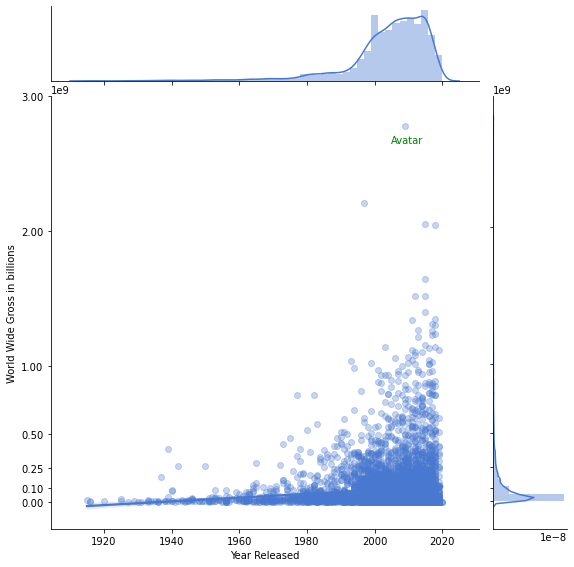

In [364]:

graph = sns.jointplot(x = 'Release_Year', y = 'worldwide_gross', data = budget, kind = 'reg', height = 8, scatter_kws={'alpha':0.3})
graph.set_axis_labels('Year Released', 'World Wide Gross in billions') # Set axis labels.
graph.ax_joint.set_yticks([0, 100000000, 250000000, 500000000, 1000000000, 2000000000, 3000000000]) # Set custom ticks.
plt.text(2005,2650000000,'Avatar', color = 'green') # Add text for Avatar.
sns.despine()

# INSIGHT


As the graph shows, over the decades the movie business has become extremely lucrative. However, even though the revnues have gone up, most movies do not touch top tier of revenue. That slot is mostly reserved for feature films with extremely high budgets. Therefore, the higher the budget, the higher are the chances of generating high revenues.

# Directors Role In Generating Revenue 

IMPORT DATA

In [365]:
imdbase = pd.read_csv(r"C:\Users\saadr\Downloads\IMDB-Movie-Data.csv")
imdbase

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


UNSTRANGLE AND CLEAN THE DATA

Check for missing values

In [366]:
imdbase.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


imdbase.head()

In [367]:
imdbase.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [368]:
imdbase.shape

(1000, 12)

Drop unecessary columns

In [369]:
imdbase.drop(['Description', 'Rank'], axis=1, inplace=True)


In [370]:
imdbase

,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...
995,Secret in Their Eyes,"Crime,Drama,Mystery",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,Hostel: Part II,Horror,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,Step Up 2: The Streets,"Drama,Music,Romance",Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,Search Party,"Adventure,Comedy",Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [371]:
#check missing values
imdbase.isnull().sum()

Title                   0
Genre                   0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

Drop the rows with missing values

In [372]:
#Remove rows with missing values
imdbase = imdbase[imdbase['Revenue (Millions)'] .notnull()]
imdbase = imdbase[imdbase['Metascore'] .notnull()]
imdbase

,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...
993,Resident Evil: Afterlife,"Action,Adventure,Horror",Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,Project X,Comedy,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,Hostel: Part II,Horror,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,Step Up 2: The Streets,"Drama,Music,Romance",Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


Sort the directors in the order of the number of movies they have done

In [373]:
# lets sort our directors from the most movies to the least
top_directors = (imdbase.groupby('Director')['Title'].count()).sort_values(ascending=False)

# Plotting the graph
Here we pkot the graph to illustrate which director has done how many movies. We do so in assending order so that director with the most amount of movies comes on top and its easier to analyse their worth. We chose the top 30 directors to make it easier sine there were hundreds and we dont need to go through all of them

Text(0.5, 1.0, 'No. of Movies directed by top 30')

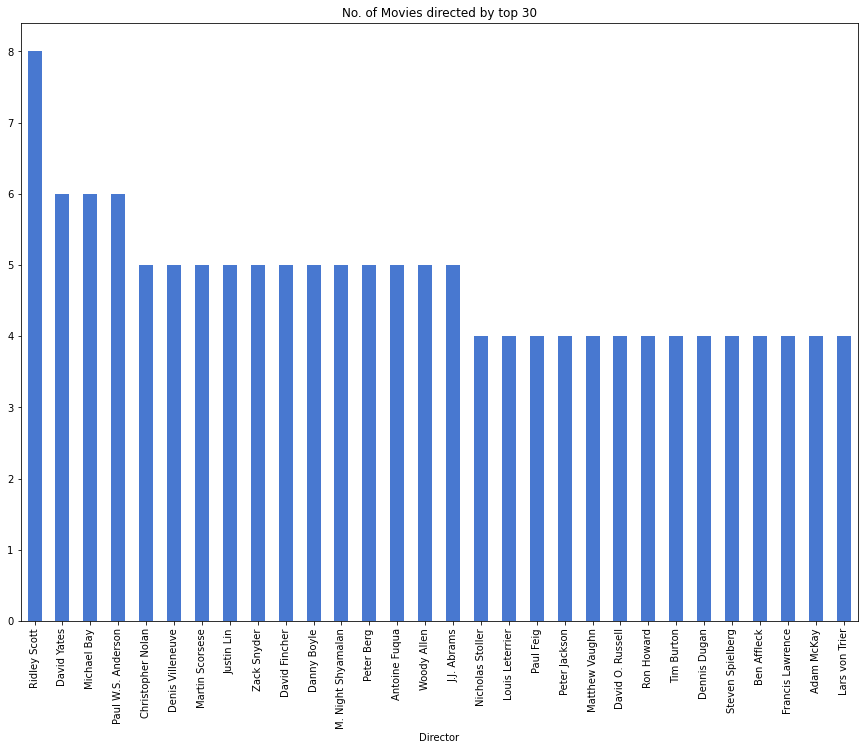

In [374]:
#draw a bar graph to illustrate
top_directors[:30].plot(kind='bar', figsize=(15,11), title='No. of movies directed').yaxis.label.set_visible(True);
plt.title('No. of Movies directed by top 30')

In [375]:
# change dtype for revenue in case we need to make calculations 
imdbase['Revenue (Millions)'] = imdbase['Revenue (Millions)'].astype('int64')

In [376]:
imdbase.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Title               838 non-null    object 
 1   Genre               838 non-null    object 
 2   Director            838 non-null    object 
 3   Actors              838 non-null    object 
 4   Year                838 non-null    int64  
 5   Runtime (Minutes)   838 non-null    int64  
 6   Rating              838 non-null    float64
 7   Votes               838 non-null    int64  
 8   Revenue (Millions)  838 non-null    int64  
 9   Metascore           838 non-null    float64
dtypes: float64(2), int64(4), object(4)
memory usage: 72.0+ KB


In [377]:
#rename Reveue column in order to make it easier to access
imdbase.rename(columns={'Revenue (Millions)': 'Revenue'}, inplace=True)
imdbase

,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue,Metascore
0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333,76.0
1,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126,65.0
2,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138,62.0
3,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270,59.0
4,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325,40.0
...,...,...,...,...,...,...,...,...,...,...
993,Resident Evil: Afterlife,"Action,Adventure,Horror",Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60,37.0
994,Project X,Comedy,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54,48.0
996,Hostel: Part II,Horror,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17,46.0
997,Step Up 2: The Streets,"Drama,Music,Romance",Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58,50.0


# Directors and the Revenue they generate per movie

In [378]:
# here we find the average revenue a director generates for a movie
avg_revenue = imdbase.groupby('Director').Revenue.mean().sort_values(ascending=False).head(30)
avg_revenue

Director
James Cameron           760.000000
Colin Trevorrow         652.000000
Joss Whedon             540.500000
Lee Unkrich             414.000000
Gary Ross               408.000000
Chris Buck              400.000000
Chris Renaud            368.000000
Gareth Edwards          366.000000
Tim Miller              363.000000
Byron Howard            341.000000
Kyle Balda              336.000000
J.J. Abrams             336.000000
Anthony Russo           333.500000
Francis Lawrence        324.500000
Pete Docter             324.000000
Pierre Coffin           309.500000
Christopher Nolan       302.600000
David Slade             300.000000
Bill Condon             286.500000
Sam Raimi               285.000000
Andrew Stanton          279.500000
David Yates             271.166667
Christophe Lourdelet    270.000000
Dan Scanlon             268.000000
Jon Favreau             256.250000
Gore Verbinski          246.666667
Robert Stromberg        241.000000
Mark Andrews            237.000000
Michael Bay

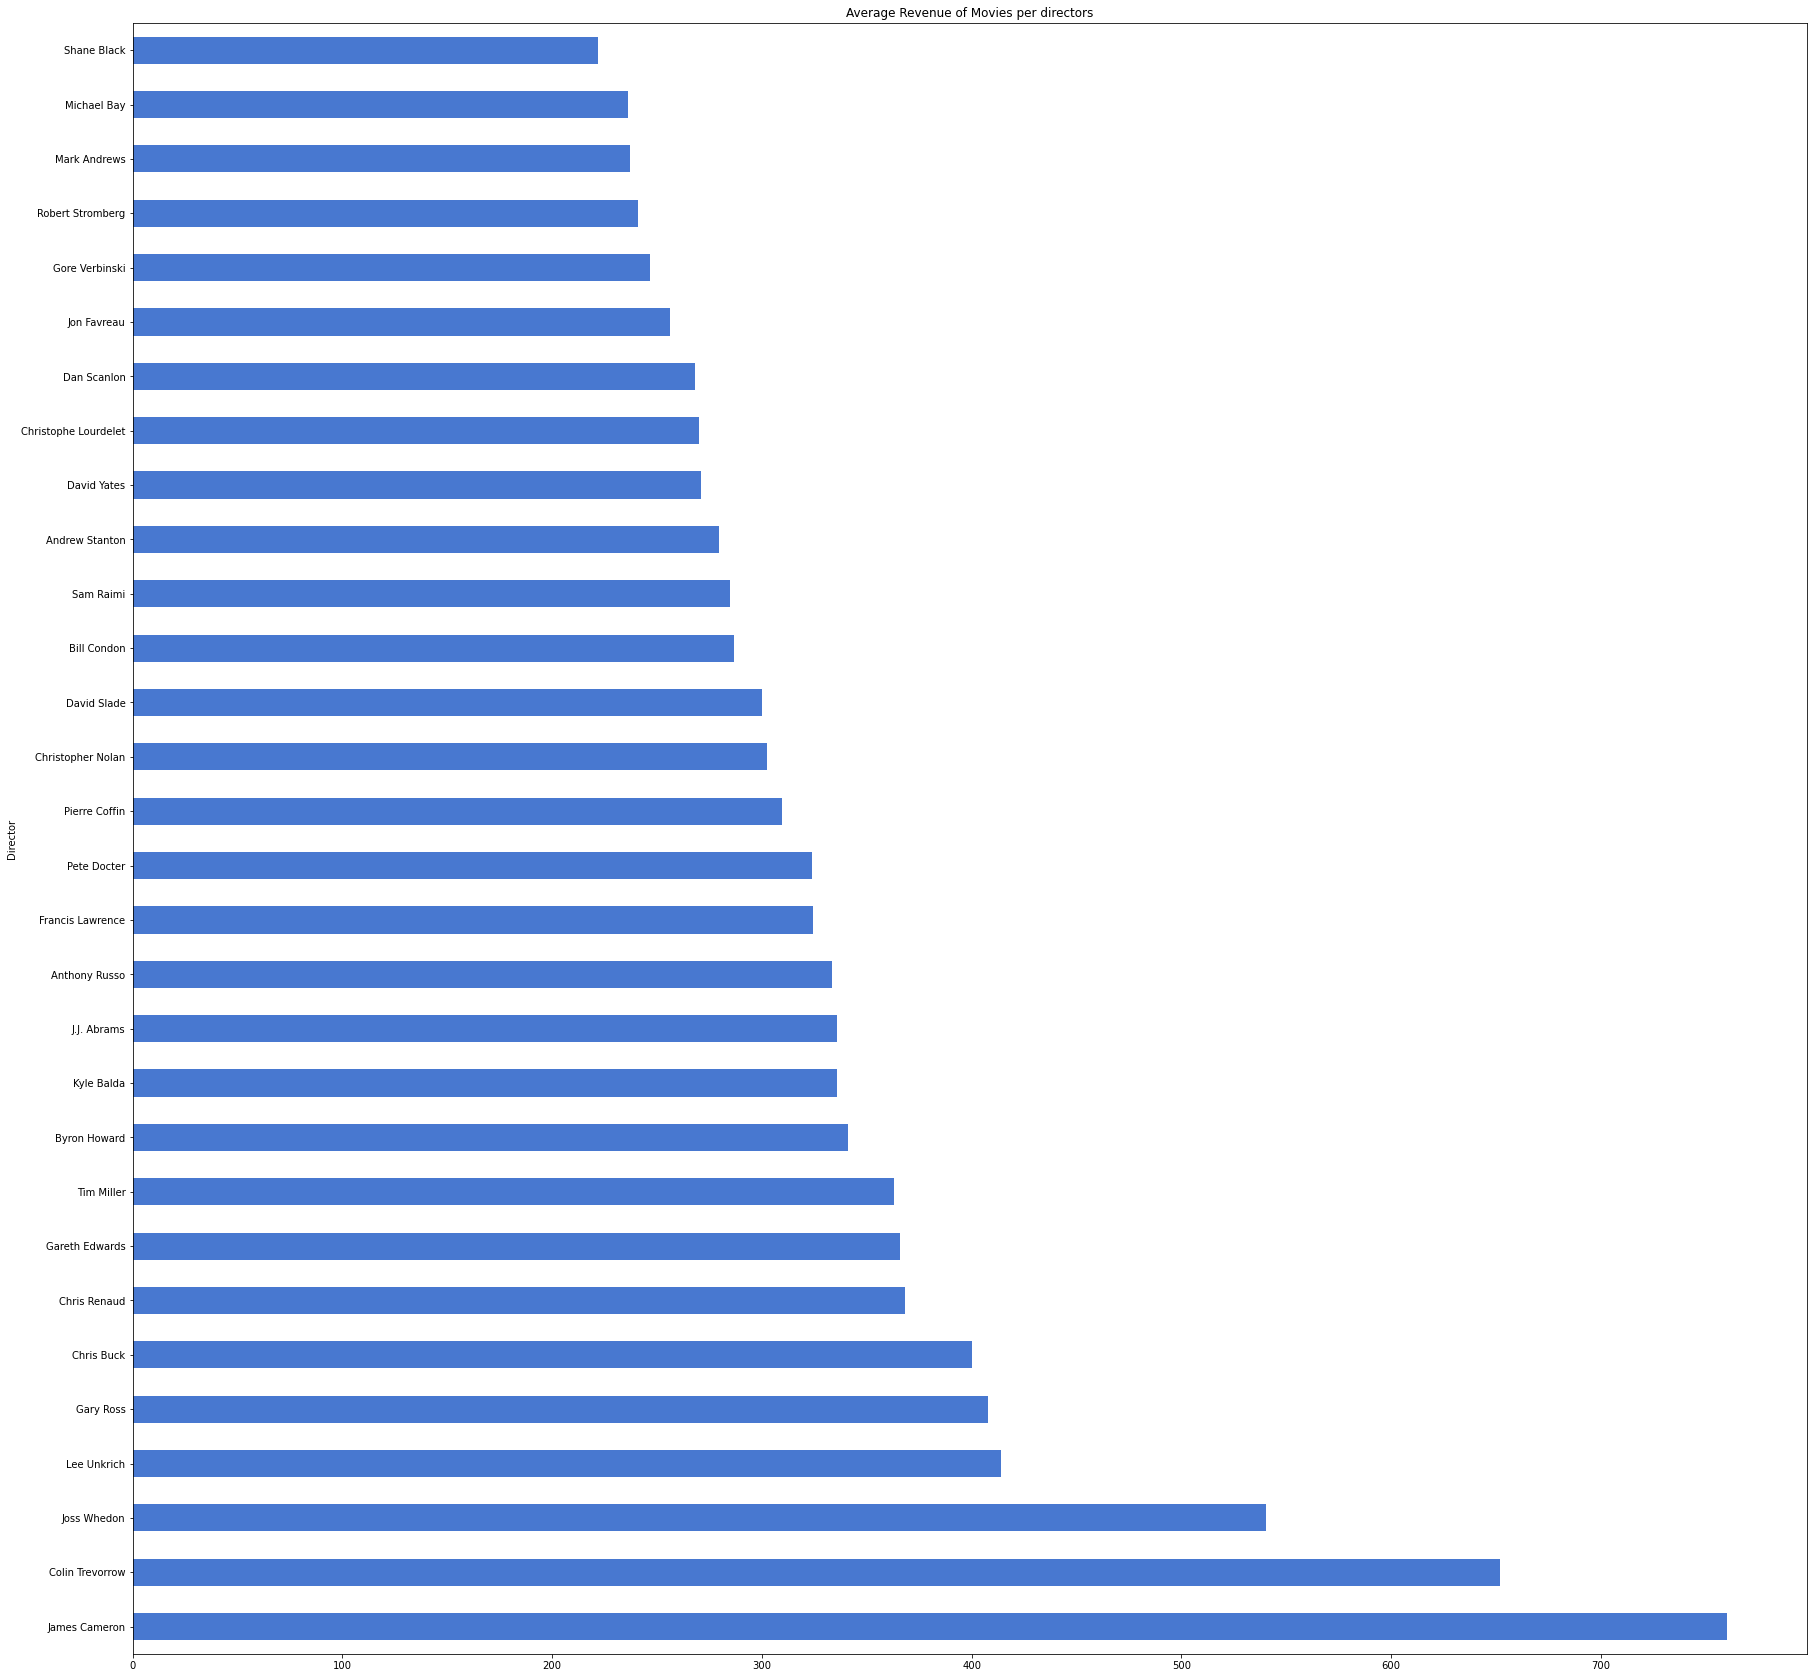

In [379]:
avg_revenue.plot(kind='barh', figsize=(30, 30), sort_columns='True', title='Average Revenue of Movies per directors' );

Here we can see that James Cameron's movies generate the most revenue, at $760 million per movie. Thats not surprising at all considering Avatar alone made upwards of $2 Billion 

# FINAL CONCLUSION

As someone who has looked at the data veey carefully, I would offer three conclusions 
- This is a really great time to make movies. The business gets very lucrative with time, even with taking inflation and other factors into account.
- Mictosoft should pick a director that has a good amount of movies in their resume. That suggests that studios trust the director enough to invest millions of dollars on their work
-Or Microsooft could pick someone as their director, someone who has made movies that have generated innumerable amount of money. James Cameron is one of such examples. However, the budget would automatically have to shoot up with directos like James Cameron getting on board since his movies are extremly high budget.